# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [1]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    it = 0
    x = x0
    while abs(f(x)) > eps and it < maxiter:
        x = x - f(x)/fder(x)
        it+=1
    return x, it

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [3]:
def test1(x):
    return x**2 - 1
def test1der(x):
    return 2 * x
print(newton_iteration(test1, test1der, 7))
print(newton_iteration(test1, test1der, -100))

(1.00000002018138, 6)
(-1.0000000025490745, 10)


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

m= 1 result is 1.0010190389301679 number of iterations is 25
m= 2 result is 1.0000714038711747 number of iterations is 9
m= 3 result is 1.0011825820421454 number of iterations is 11
m= 4 result is 99.99999999980673 number of iterations is 1000
m= 5 result is -1.001130821541154 number of iterations is 509
minimal number of iterations is reached when m=2, e.g equal multiplity of a root
 Непосредственно скорость сходимости оценивают по тангенсу угла наклона логарифмического графика зависимости (x_i-1) от (x_(i-1)-1)
 if m=1, converage is linear and it is bad. We can see it on graphics: limit on the 1 plot between 0 and 1
limits are (25, 9)


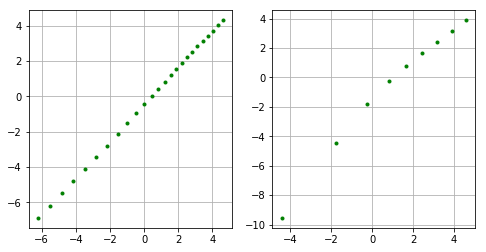

In [4]:
def smart_newton(f, fder, x0, m=1, eps=1e-5, maxiter=1000): 
    it = 0
    x = x0 
    while abs(f(x)) > eps and it < maxiter and fder(x)!=0:
        x = x - m * f(x)/fder(x)
        it+=1
    return x, it

def test2(x):
    return (x**2 - 1)**2
def test2der(x):
    return 4*(x**2 - 1)*x

for param in range(1,6):
    res, it = smart_newton(test2, test2der, 100, m=param)
    print('m=', param, 'result is', res,'number of iterations is', it)

def test(f, fder, x0, answer, m=1, eps=1e-5, maxiter=1000): 
    it1 = 0
    x = x0 
    while abs(f(x)) > eps and it1 < maxiter and fder(x)!=0:
        ax1.plot(np.log(x-1), np.log(x - f(x)/fder(x)-1), '.', color = 'green')
        x = x - f(x)/fder(x)
        it1+=1
    x = x0
    it2 = 0
    while abs(f(x)) > eps and it2 < maxiter and fder(x)!=0:
        ax2.plot(np.log(x-1), np.log(x - m * f(x)/fder(x)-1), '.', color = 'green')
        x = x - m * f(x)/fder(x)
        it2+=1
    ax1.grid()
    ax2.grid()
    return it1, it2
print('minimal number of iterations is reached when m=2, e.g equal multiplity of a root')
print(' Непосредственно скорость сходимости оценивают по тангенсу угла наклона логарифмического графика зависимости (x_i-1) от (x_(i-1)-1)\n if m=1, converage is linear and it is bad. We can see it on graphics: tangens is nearly 1 at first picture and bigger then 1 at second')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(8, 4))
print('limits are',test(test2, test2der, 100, 1, m=2))

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

We can see that the root is nearly 0.64. Lets check it
Newton iterations finded root at 0.6417143710025017 with 3 iterations


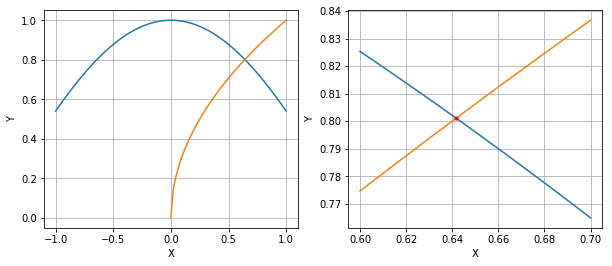

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

x1 = np.linspace(-1,1,100)
x2 = np.linspace(0.6,0.7,100)

ax1.plot(x1,np.cos(x1), np.linspace(0,1,50), np.sqrt(np.linspace(0,1,50)))

#Подписи графиков и все такое
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.plot(x2,np.cos(x2), x2, np.sqrt(x2))
ax1.grid()
ax2.grid()

def test3(x):
    return np.cos(x) - np.sqrt(x)
def test3der(x):
    return -np.sin(x) - 1/2/np.sqrt(x)

print('We can see that the root is nearly 0.64. Lets check it')
root, it = newton_iteration(test3, test3der, 1)
print('Newton iterations finded root at', root, 'with', it, 'iterations')
ax2.plot(root, np.cos(root),'.', color='red')

as we can see, derivative of function cos(x)-sqrt(x) at our root is between -1.225 and -1.220, e.g. alpha≈-0.82 is good parameter. Lets check it

 if alpha = 0.82, root is 0.6417201632887624 finded with 3 iterations


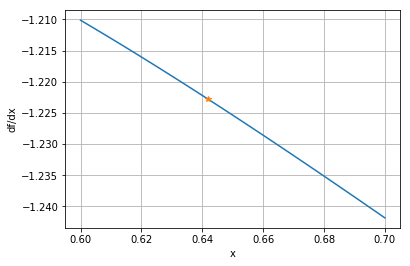

In [7]:
plt.plot(x2, -np.sin(x2)-1/2/np.sqrt(x2), root, -np.sin(root)-1/2/np.sqrt(root), '*')
plt.xlabel('x')
plt.ylabel('df/dx')
plt.grid()
print('as we can see, derivative of function cos(x)-sqrt(x) at our root is between -1.225 and -1.220, e.g. alpha≈-0.82 is good parameter. Lets check it')

def genius_newton(f, fder, x0, alpha, eps=1e-5,maxiter=1000):
    it = 0
    x = x0
    while abs(f(x)) > eps and it < maxiter:
        x = x - alpha * f(x)
        it+=1
    return x, it
root, it = genius_newton(test3, test3der, 3, -0.82)
print('\n if alpha = 0.82, root is', root, 'finded with', it, 'iterations')

In [8]:
print('Lets compare roots and algorythm speed with different values of alpha')
for alpha in np.arange(-1,1,0.1):
    root, it = genius_newton(test3, test3der, 3, alpha)
    print('alpha:', alpha, 'root:', root, 'iterations:', it)
print('As we can see, right value is reached when alpha=-0.8 with minimum number of iterations')

Lets compare roots and algorythm speed with different values of alpha
alpha: -1.0 root: 0.6417123696492191 iterations: 9
alpha: -0.9 root: 0.6417152031805504 iterations: 6
alpha: -0.8 root: 0.6417141648037556 iterations: 4
alpha: -0.7000000000000001 root: 0.6417168461797093 iterations: 7
alpha: -0.6000000000000001 root: 0.6417177869948945 iterations: 10
alpha: -0.5000000000000001 root: 0.6417177972719613 iterations: 14
alpha: -0.40000000000000013 root: 0.6417199028444962 iterations: 19
alpha: -0.30000000000000016 root: 0.6417197429559404 iterations: 28
alpha: -0.20000000000000018 root: 0.6417208238315832 iterations: 45
alpha: -0.1000000000000002 root: 0.6417225487897266 iterations: 95
alpha: -2.220446049250313e-16 root: 2.999999999999556 iterations: 1000
alpha: 0.09999999999999964 root: 2647.22273989722 iterations: 1000
alpha: 0.19999999999999973 root: 10274.071686021518 iterations: 1000
alpha: 0.2999999999999998 root: 22861.56125276154 iterations: 1000
alpha: 0.3999999999999997 root: 

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

In [9]:
def test5(x):
    return x**3-1
def test5der(x):
    return 3*x**2

roots=np.exp(np.arange(0,3)*2*np.pi*1j/3)

initialReal=np.linspace(-2,2,1000)
initialImag=np.linspace(-2,2,1000)

XR,YR=np.meshgrid(initialReal,initialImag)
initial=XR + 1j*YR
results=np.zeros(np.shape(initial))

for i in range(np.shape(results)[0]):
    for j in range(np.shape(results)[1]):
        find_root = abs(roots - newton_iteration(test5,test5der, initial[i,j])[0])
        results[i,j] = np.argmin(find_root)
        

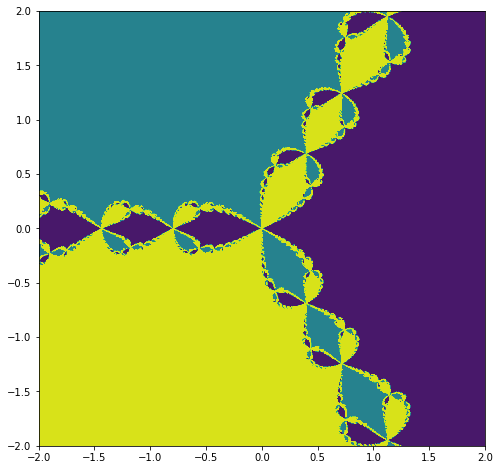

In [10]:
fig, ax1 = plt.subplots(figsize=(8, 8))
h = plt.contourf(XR,YR,results)
plt.show()